## Imports

In [182]:
import dynamiqs as dq
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import jax.numpy as jnp

## 1. Simulate the dynamics of cat qubits at the effective Hamiltonian level.

In Tutorial 1, we have introduced that we can dissipatively stabilize a cat qubit by coupling a memory mode  that will store our cat qubit to a lossy buffer mode with a specific interaction that exchanges two photons of the memory mode with one photon in the buffer mode.

For this, consider the Lindblad master equation:

$$\frac{d \hat{\rho}}{dt} = \mathcal{L}[\hat{\rho}] = -i \left[\hat{H}, \hat{\rho}\right] + \kappa_b \mathcal{D}(\hat{b})[\hat{\rho}]$$

The Hamiltonian of the system is given by
```math
\begin{aligned}
\hat{H} &= \hat{H}_{\mathrm{2ph}} + \hat{H}_d,\qquad \mathrm{with}\\
\hat{H}_{\mathrm{2ph}} &= g_2 {{}\hat{a}^\dagger}^2 \hat{b} + g_2^* \hat{a}^2 \hat{b}^\dagger,\\
\hat{H}_d &= \epsilon_d^* \hat{b} + \epsilon_d \hat{b}^\dagger.
\end{aligned}
```

Here, $\hat{H}_{\mathrm{2ph}}$ is the two-photon exchange Hamiltonian and $\hat{H}_d$ is the buffer drive Hamiltonian.

### Task 1.1
**Task 1.1: Getting started with `dynamiqs`**

Using `dynamiqs`, simulate the time-evolution of this system with the following parameters:

```math
\begin{aligned}
g_2 = 1.0, 
\epsilon_d = -4, 
\kappa_b = 10
\end{aligned}
```

(For now, we pretend that the parameters are without dimensions)

Use an initial state $\lvert \psi_0 \rangle$ in which both the buffer and the memory are in the vacuum. Use a Hilbert-space truncation of $n_a = 20$ and $n_b = 5$ (number of Fock-states in mode a and mode b, respectively) to begin with. You can play with a different Hilbert-space truncation.

Simulate the dynamics for a time $T=4$. 

Plot the wigner function of mode a (as a GIF or as a mosaic plot).

Also plot the expectation value of the number of photons, as well as the photon number parity in the memory mode.

In [183]:
# Define parameters
g2 = 1.0
epsilon_d = -4
kappa_b = 10
T = 4.0  # Simulation time
na = 20  # Hilbert space truncation for memory mode
nb = 5   # Hilbert space truncation for buffer mode

# Define annihilation operators correctly for both modes
a, b = dq.destroy(na, nb)

# Define initial state: vacuum state for both modes
psi0 = dq.tensor(dq.fock(na, 0), dq.fock(nb, 0))

# Define the 2ph Hamiltonian
H_2PH = g2 * (a @ a @ b.dag() + a.dag() @ a.dag() @ b)

# Define the Driving Hamiltonian
H_D = epsilon_d * (b + b.dag())

# Define Hamiltonian (using g2 and epsilon_d)
H = H_2PH + H_D

# Define dissipation (buffer decay)
jump_ops = [jnp.sqrt(kappa_b) * b]

# Define time evolution
tsave = jnp.linspace(0, T, 100)

# Solve the master equation
res = dq.mesolve(H, jump_ops, psi0, tsave)

# Extract the memory mode (mode_a) by partial tracing
rho_a = dq.ptrace(res.states,0)  # Keep only mode a


|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

  0%|          | 0/48 [00:00<?, ?it/s]

100%|██████████| 48/48 [00:02<00:00, 19.64it/s]


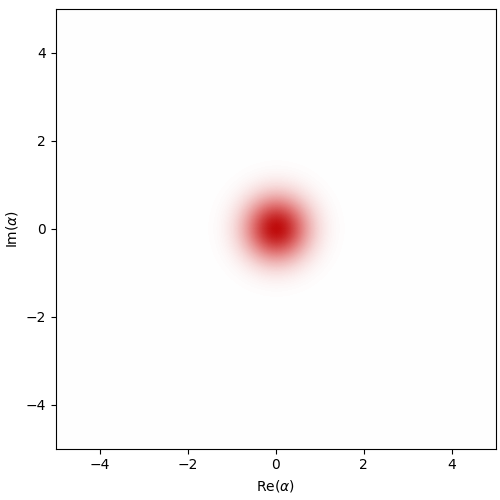

In [185]:
# Plot Wigner function of mode a
dq.plot.wigner_gif(rho_a, gif_duration = 2, fps=24)

In [186]:
# Compute Expectation Values for Mode a
exp_photon_a = dq.expect(dq.number(na), rho_a)  # Photon number expectation
exp_parity_a = dq.expect(dq.parity(na), rho_a)  # Photon number parity

In [187]:
exp_parity_a # Acquired using the dynamiqs parity API. Unsure as to why it does not start from 0 (and immediately jump to 1)

Array([1.        +0.j, 0.99999994+0.j, 1.0000001 +0.j, 1.0000001 +0.j,
       1.        +0.j, 0.99999994+0.j, 1.        +0.j, 1.0000001 +0.j,
       1.        +0.j, 1.        +0.j, 1.        +0.j, 1.0000001 +0.j,
       1.        +0.j, 0.9999999 +0.j, 1.        +0.j, 0.9999999 +0.j,
       0.9999999 +0.j, 0.99999994+0.j, 0.99999994+0.j, 1.        +0.j,
       1.        +0.j, 1.        +0.j, 1.        +0.j, 1.0000001 +0.j,
       1.        +0.j, 0.99999994+0.j, 1.        +0.j, 0.9999998 +0.j,
       0.99999994+0.j, 0.99999994+0.j, 0.99999994+0.j, 1.        +0.j,
       0.99999994+0.j, 0.9999999 +0.j, 0.9999998 +0.j, 1.        +0.j,
       1.        +0.j, 0.99999994+0.j, 1.        +0.j, 1.0000001 +0.j,
       1.        +0.j, 1.        +0.j, 1.        +0.j, 0.99999994+0.j,
       0.99999994+0.j, 0.99999994+0.j, 1.        +0.j, 1.0000001 +0.j,
       1.0000001 +0.j, 1.        +0.j, 1.0000001 +0.j, 1.0000002 +0.j,
       1.        +0.j, 1.        +0.j, 1.0000001 +0.j, 0.99999994+0.j,
      

/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/arvindtawker/miniconda3/lib/python3.10/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


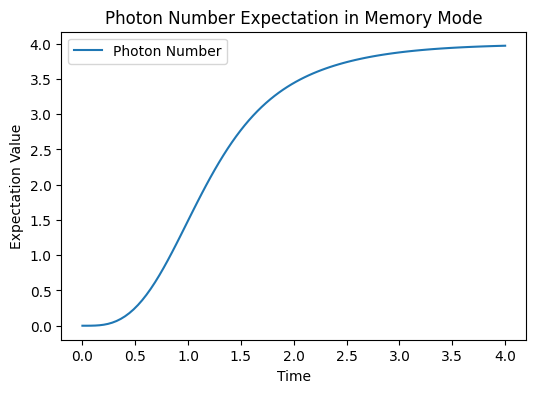

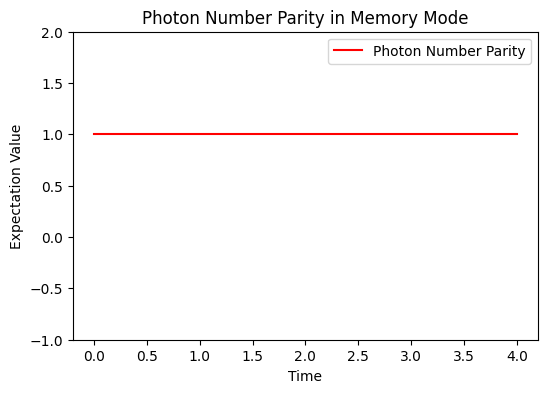

In [188]:
# Plot Photon Number Expectation
plt.figure(figsize=(6, 4))
plt.plot(tsave, exp_photon_a, label="Photon Number")
plt.xlabel("Time")
plt.ylabel("Expectation Value")
plt.legend()
plt.title("Photon Number Expectation in Memory Mode")
plt.show()

# Plot Photon Number Parity
plt.figure(figsize=(6, 4))
plt.plot(tsave, exp_parity_a, label="Photon Number Parity", color="red")
plt.xlabel("Time")
plt.ylabel("Expectation Value")
plt.legend()
plt.title("Photon Number Parity in Memory Mode")

# Set y-axis limits (optional, adjust as needed)
plt.ylim([- 1, 2])

plt.show()

## Task 1.2
**Task 1.2: Comparison with eliminated buffer mode**

Compare your result from Task 1.1 to the system where the buffer mode is adiabatically eliminated, in which the dynamics of the memory mode is given by:
```math
\frac{d \hat{\rho}_a}{d t} = \kappa_2 \mathcal{D}[\hat{a}^2 - \alpha^2](\hat{\rho}_a),
```
with two-photon dissipation rate $\kappa_2 = 4|g_2|^2 / \kappa_b$ and cat amplitude $\alpha^2 = -\epsilon_d/g_2^*$.

Compute the time-evolution of the fidelity between the time-evolved states computed with the two-mode system from Task 1.1. What do you observe if you lower $\kappa_b$?

In [189]:
# Define kappa_2
kappa_2 = 4 * (jnp.abs(g2)**2) / kappa_b 

# Define single-mode annihilation operator
a_single = dq.destroy(na)

# Define effective Hamiltonian (set to zero for pure dissipation case)
H_eff = dq.zeros(na)

# Define the cat amplitude
alpha_squared = -(epsilon_d / g2)

# Define the two-photon loss operator
L2 = jnp.sqrt(kappa_2) * (a_single @ a_single - alpha_squared * dq.eye(na))

# Find the result using mesolve
res_eff = dq.mesolve(H_eff, [L2], dq.fock(na, 0), tsave)

|          |   0.2% ◆ elapsed 3.36ms ◆ remaining 0.00ms

In [190]:
# Calculate the fidelity of the full and effective system
F = dq.fidelity(rho_a[-1], res_eff.states[-1])
print(f"Fidelity between full and effective system: {F:.4f}")

|██████████| 100.0% ◆ elapsed 29.43ms ◆ remaining 0.00ms

Fidelity between full and effective system: 1.0001


We see, here, that a *Fidelity* of F $\approx 1$ indicates that the two-mode system can be well approximated by the single-mode system.

Full Two-Mode System


100%|██████████| 48/48 [00:02<00:00, 19.46it/s]


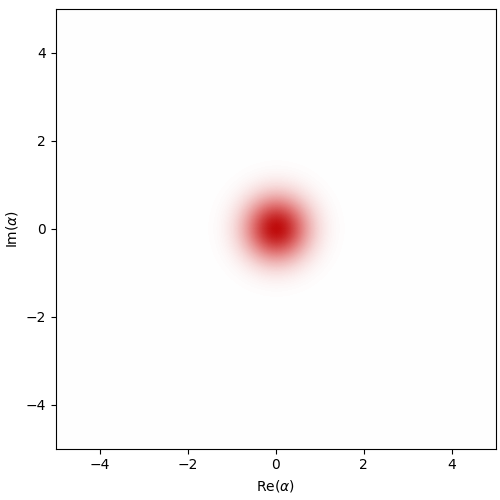

In [191]:
print("Full Two-Mode System")
dq.plot.wigner_gif(rho_a, gif_duration = 2, fps=24)

Effective Single-Mode System


100%|██████████| 48/48 [00:02<00:00, 22.22it/s]


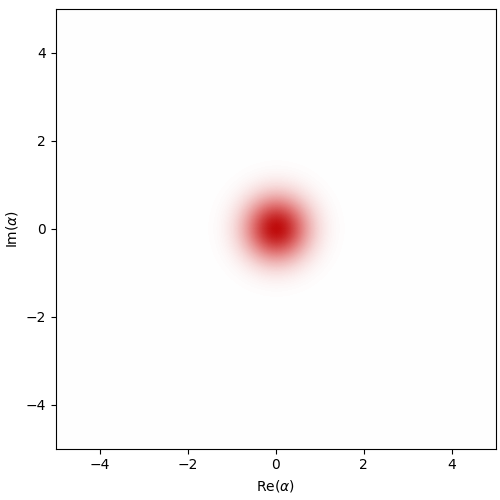

In [192]:
print("Effective Single-Mode System")
dq.plot.wigner_gif(res_eff.states, gif_duration = 2, fps=24)

### Task 1.3
**Task 1.3: Performing a Zeno-gate**

To fully control a cat qubit, we also need to be able to perform gates.

**$Z(\theta)$-rotation**: In addition to the dissipative stabilization mechanism simulated in Task 1.1, find a Hamiltonian that performs a contiuous rotation around the $Z$-axis of the qubit, also called Zeno gate, (as a reminder: the cat states $\lvert \mathcal{C}_\alpha^ \pm \rangle$ define the logical $X$-eigenstates $\lvert\pm\rangle$). This additional Hamiltonian has the form: $\hat{H}_Z = \epsilon_Z^* \hat{O} + \epsilon_Z \hat{O}^\dagger$, where $\hat{O}$ is a bosonic operator.

**a)** Simulate the time-evolution that maps $\lvert+\rangle$ to $\lvert-\rangle$ in a time $T_Z$, where $2T_Z$ is the time it takes to make a full rotation.
The speed of rotation will depend on the strenght of the parameter $\epsilon_Z$ in the Hamiltonian $H_Z$ that generates the rotation.

**b)** Optimize parameters: In a real-world scenario, also our memory mode is subject to losses of single photons. Let $\kappa_a$ be the single-photon loss rate of mode a.

For various values of $\kappa_a$ from the interval $\kappa_a \in [0.01, 2]$ and for various values of $\epsilon_Z$, plot the parity as a function of time in the presence of $\hat{H}_Z$.

For the parameter range of $\kappa_a$ above, find the optimal times $T_Z$ for a rotation of $\theta = 0 \rightarrow \pi.$